In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

df=pd.read_csv("cs-training.csv")

In [3]:
df.shape

(150000, 12)

In [4]:
df.isnull().sum()

ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
ID                                      150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [6]:
df=df.drop(df.columns[[4,8,10]],axis=1)

In [7]:
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,1,0.766127,45,0.802982,9120.0,13,6,2.0
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0
3,4,0,0.233810,30,0.036050,3300.0,5,0,0.0
4,5,0,0.907239,49,0.024926,63588.0,7,1,0.0


In [8]:
df.columns

Index(['ID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents'],
      dtype='object')

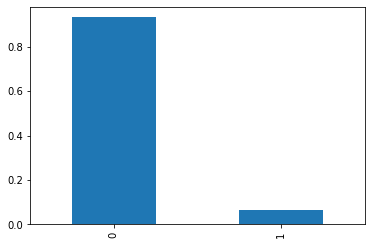

In [9]:
df['SeriousDlqin2yrs'].value_counts(normalize=True).plot(kind="bar")


In [10]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [11]:
df.tail()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
149995,149996,0,0.040674,74,0.225131,2100.0,4,1,0.0
149996,149997,0,0.299745,44,0.716562,5584.0,4,1,2.0
149997,149998,0,0.246044,58,3870.000000,NaN,18,1,0.0
149998,149999,0,0.000000,30,0.000000,5716.0,4,0,0.0
149999,150000,0,0.850283,64,0.249908,8158.0,8,2,0.0


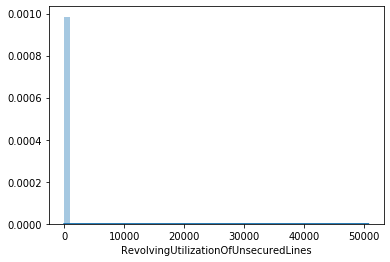

In [12]:
sns.distplot(df['RevolvingUtilizationOfUnsecuredLines'])

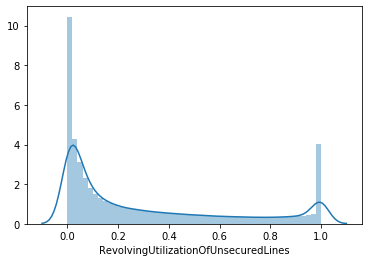

In [13]:
sns.distplot(df[df['RevolvingUtilizationOfUnsecuredLines']<1]['RevolvingUtilizationOfUnsecuredLines'],kde=True)

Outliers are normally droped from the dateset.However since the number of outlier observations are large, we will treat these as missing values and impute.


In [14]:
df['RevolvingUtilizationOfUnsecuredLines']=df['RevolvingUtilizationOfUnsecuredLines'].apply(lambda x:np.NaN if x>1 else x)

In [15]:
df['RevolvingUtilizationOfUnsecuredLines'].isnull().sum()

3321

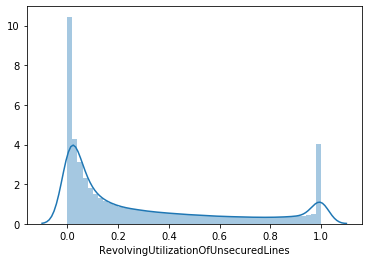

In [16]:
sns.distplot(df['RevolvingUtilizationOfUnsecuredLines'].dropna())

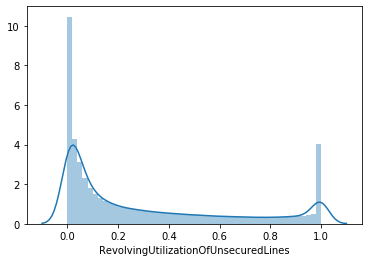

In [17]:
df['RevolvingUtilizationOfUnsecuredLines'].fillna(method="ffill",inplace=True)

sns.distplot(df['RevolvingUtilizationOfUnsecuredLines'])

After impuattion with median we notice a spike at the median. Hence, we adopted an imputation that preserves the impuatation of the data


In [18]:
df['RevolvingUtilizationOfUnsecuredLines'].median()

0.1442572225

In [19]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          0.303669
std           0.337852
min           0.000000
25%           0.028578
50%           0.144257
75%           0.520104
max           1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

# AGE

In [20]:
df["age"].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

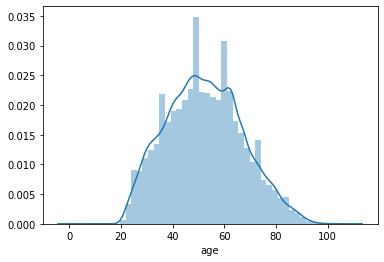

In [21]:
sns.distplot(df['age'],kde=True)

In [22]:
df['age'] = df['age'].apply(lambda x: np.NaN if (x>80)|(x<18) else x)

In [23]:
df['age'].describe()

count    145063.000000
mean         51.171663
std          13.665503
min          21.000000
25%          41.000000
50%          51.000000
75%          62.000000
max          80.000000
Name: age, dtype: float64

Finance industry typically limit age of customers between 18 and 80. Also there are about 4000 observations above 80years of age. Since this is large we made those values missing to impute later

In [24]:
# Using ffill method
df['age'].fillna(method='ffill',inplace=True)

In [25]:
df['age'].fillna(df['age'].median(),inplace=True)

In [26]:
df['age'].describe()

count    150000.000000
mean         51.170047
std          13.667271
min          21.000000
25%          41.000000
50%          51.000000
75%          62.000000
max          80.000000
Name: age, dtype: float64

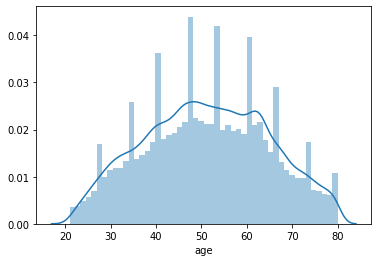

In [27]:
sns.distplot(df['age'],kde=True)

In [28]:
df['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

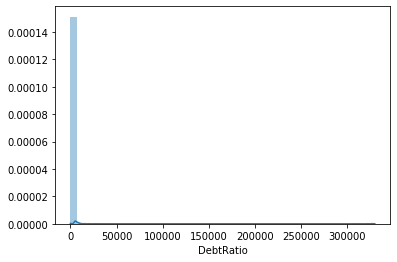

In [29]:
sns.distplot(df['DebtRatio'])

In [30]:
df['DebtRatio'] = df['DebtRatio'].apply(lambda x: np.NaN if x>1 else x)

In [31]:
df['DebtRatio'].describe()

count    114863.000000
mean          0.303022
std           0.226287
min           0.000000
25%           0.125981
50%           0.274505
75%           0.438098
max           1.000000
Name: DebtRatio, dtype: float64

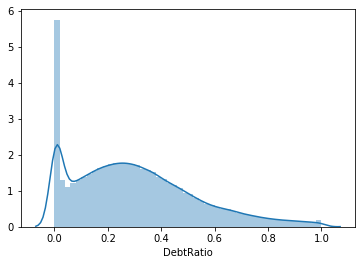

In [32]:
sns.distplot(df['DebtRatio'].dropna())

In [33]:
a = df['DebtRatio'].fillna(df['DebtRatio'].median())

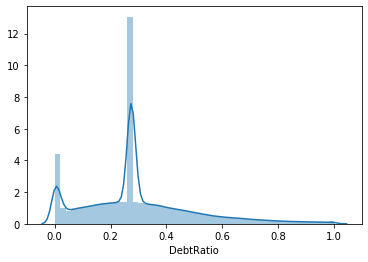

In [34]:
sns.distplot(a)

In [35]:
a.describe()

count    150000.000000
mean          0.296342
std           0.198385
min           0.000000
25%           0.175074
50%           0.274505
75%           0.380021
max           1.000000
Name: DebtRatio, dtype: float64

In [36]:
b = df['DebtRatio'].fillna(method='ffill')
b.describe()

count    150000.000000
mean          0.303109
std           0.226290
min           0.000000
25%           0.126122
50%           0.274252
75%           0.438325
max           1.000000
Name: DebtRatio, dtype: float64

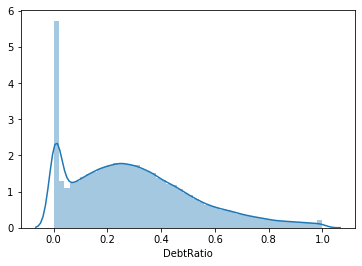

In [37]:
sns.distplot(b)

In [38]:
df['DebtRatio'].fillna(method='ffill',inplace=True)

### NumberOfOpenCreditLinesAndLoans

In [39]:
df['NumberOfOpenCreditLinesAndLoans'].describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

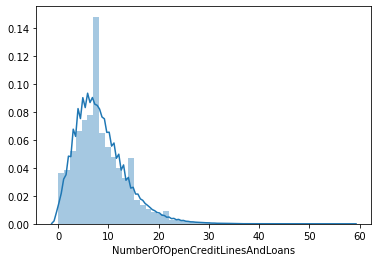

In [40]:
sns.distplot(df['NumberOfOpenCreditLinesAndLoans'])

In [41]:
(3 * np.std(df['NumberOfOpenCreditLinesAndLoans'])) + np.mean(df['NumberOfOpenCreditLinesAndLoans'])

23.890561509340078

In [42]:
df.loc[df['NumberOfOpenCreditLinesAndLoans']>24,'NumberOfOpenCreditLinesAndLoans'] =24

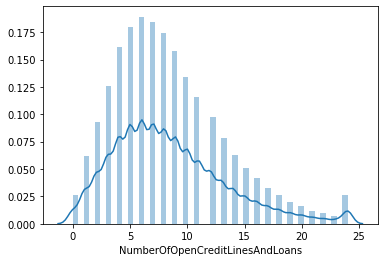

In [43]:
sns.distplot(df['NumberOfOpenCreditLinesAndLoans'])

We decided the upper limit cut off based on distribution bassed method(values greater than mu+3*sigma). Since the number of observations were less, we decided to cap the large values to cutoff.

### Monthly Income

In [44]:
df['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

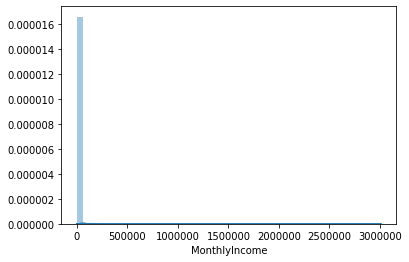

In [45]:
sns.distplot(df['MonthlyIncome'].dropna())

In [46]:
# Using IQR method, for treating outliers. zscore is not used because the standard deviation is very large

In [47]:
df['MonthlyIncome'] = df['MonthlyIncome'].apply(lambda x: np.NaN if(x<1000)|(x>15000) else x)

In [48]:
df['MonthlyIncome'].describe()

count    110557.000000
mean       5944.372749
std        3112.926942
min        1000.000000
25%        3500.000000
50%        5356.000000
75%        7916.000000
max       15000.000000
Name: MonthlyIncome, dtype: float64

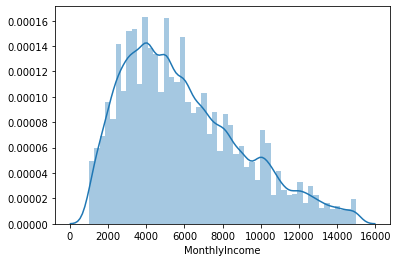

In [49]:
sns.distplot(df['MonthlyIncome'].dropna())

In [50]:
a1 = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

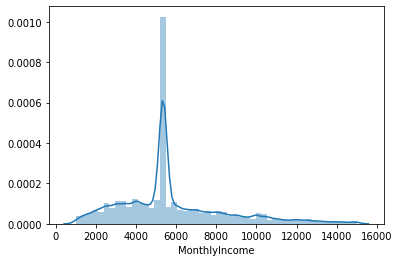

In [51]:
sns.distplot(a1)

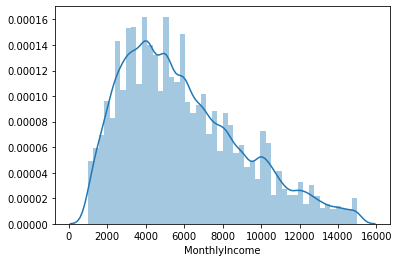

In [52]:
b1 = df['MonthlyIncome'].fillna(method='ffill')
sns.distplot(b1)

In [53]:
df['MonthlyIncome'].fillna(method='ffill',inplace=True)

Typical lower limit for monthly income to be serviced by Finance industry i $1000


Upper Cutoff is decided based on IQR method as the mean and sigma are contaminated by extremely high outlier values.

In [54]:
df['MonthlyIncome'].describe()

count    150000.000000
mean       5940.689707
std        3115.548046
min        1000.000000
25%        3500.000000
50%        5346.000000
75%        7916.000000
max       15000.000000
Name: MonthlyIncome, dtype: float64

### NumberRealEstateLoansOrLines

In [55]:
df['NumberRealEstateLoansOrLines'].describe()

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

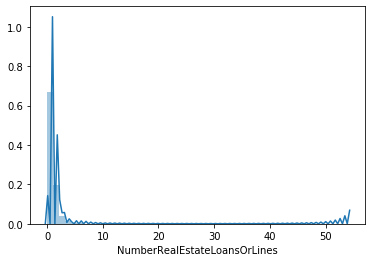

In [56]:
sns.distplot(df['NumberRealEstateLoansOrLines'])

In [57]:
df['NumberRealEstateLoansOrLines'] = df['NumberRealEstateLoansOrLines'].apply(lambda x: np.NaN if x>5 else x)

In [58]:
df['NumberRealEstateLoansOrLines'].describe()

count    149207.000000
mean          0.981234
std           0.980390
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           5.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

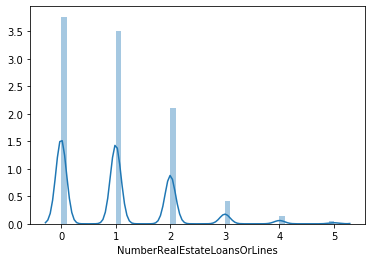

In [59]:
sns.distplot(df['NumberRealEstateLoansOrLines'].dropna())

In [60]:
df['NumberRealEstateLoansOrLines'].fillna(df['NumberRealEstateLoansOrLines'].median(),inplace=True)

### NumberOfDependents

In [61]:
df['NumberOfDependents'].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

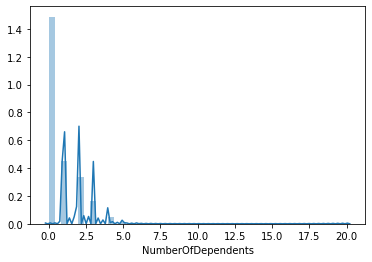

In [62]:
sns.distplot(df['NumberOfDependents'].dropna())

In [63]:
df.loc[df['NumberOfDependents']>5,'NumberOfDependents'] = 5

In [64]:
df['NumberOfDependents'].fillna(0,inplace=True)

In [65]:
df['NumberOfDependents'].describe()

count    150000.000000
mean          0.734747
std           1.093439
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: NumberOfDependents, dtype: float64

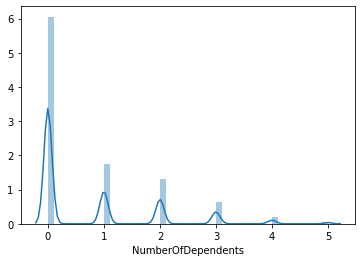

In [66]:
sns.distplot(df['NumberOfDependents'])

In [67]:
df.describe()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,0.303669,51.170047,0.303109,5940.689707,8.404000,0.981333,0.734747
std,43301.414527,0.249746,0.337852,13.667271,0.226290,3115.548046,4.946399,0.977796,1.093439
min,1.000000,0.000000,0.000000,21.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.028578,41.000000,0.126122,3500.000000,5.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.144257,51.000000,0.274252,5346.000000,8.000000,1.000000,0.000000
75%,112500.250000,0.000000,0.520104,62.000000,0.438325,7916.000000,11.000000,2.000000,1.000000
max,150000.000000,1.000000,1.000000,80.000000,1.000000,15000.000000,24.000000,5.000000,5.000000


In [69]:
df.to_pickle('gmsc_clean.pkl')

### EDA

dfs = df.drop('ID',axis=1).sample(frac=0.25)
sns.pairplot(dfs,hue='SeriousDlqin2yrs')

### SeriousDlqin2yrs and Revolving Utilization of Unsecured Credit Lines

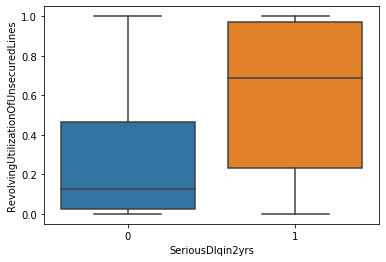

In [70]:
sns.boxplot(df['SeriousDlqin2yrs'],df['RevolvingUtilizationOfUnsecuredLines'],data=df)

In [71]:
df['RevolvingUtilizationOfUnsecuredLines'].groupby(by=df['SeriousDlqin2yrs']).agg(['mean'])

,mean
SeriousDlqin2yrs,
0,0.282806
1,0.594927


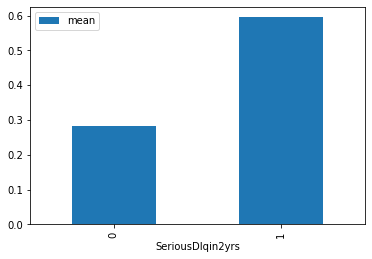

In [72]:
df['RevolvingUtilizationOfUnsecuredLines'].groupby(by=df['SeriousDlqin2yrs']).agg(['mean']).plot(kind='bar')

The chart shows that mean value of rucl is almost double for delinquents compared to non-deliquents

This obeservation is in line with what is happening in Finance industry

In [73]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          0.303669
std           0.337852
min           0.000000
25%           0.028578
50%           0.144257
75%           0.520104
max           1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [74]:
def rucl_cat(rucl):
    if rucl<=0.02:
        return 1
    elif 0.02<rucl<=0.14:
        return 2
    elif 0.14<rucl<=0.52:
        return 3
    else:
        return 4

In [75]:
df['rucl_cat']= df['RevolvingUtilizationOfUnsecuredLines'].apply(rucl_cat)

In [76]:
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,rucl_cat
0,1,1,0.766127,45.0,0.802982,9120.0,13,1.0,2.0,4
1,2,0,0.957151,40.0,0.121876,2600.0,4,0.0,1.0,4
2,3,0,0.658180,38.0,0.085113,3042.0,2,0.0,0.0,4
3,4,0,0.233810,30.0,0.036050,3300.0,5,0.0,0.0,3
4,5,0,0.907239,49.0,0.024926,3300.0,7,1.0,0.0,4


In [77]:
df['RevolvingUtilizationOfUnsecuredLines'].groupby(by=df['rucl_cat']).agg(['min','max'])

,min,max
rucl_cat,,
1,0.000000,0.020000
2,0.020003,0.139999
3,0.140022,0.519983
4,0.520023,1.000000


In [78]:
pd.crosstab(df['rucl_cat'],df['SeriousDlqin2yrs'])

SeriousDlqin2yrs,0,1
rucl_cat,,
1,30527,841
2,41717,1160
3,36208,2040
4,31522,5985


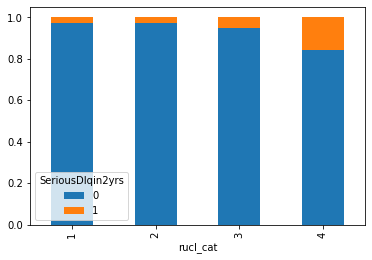

In [79]:
ct = pd.crosstab(df['rucl_cat'],df['SeriousDlqin2yrs'],normalize=0)
ct.plot.bar(stacked=True)

The chart shows that rucl more than 0.52(category 4) is quite prone to dilequent

### SeriousDlqin2yrs and MonthlyIncome

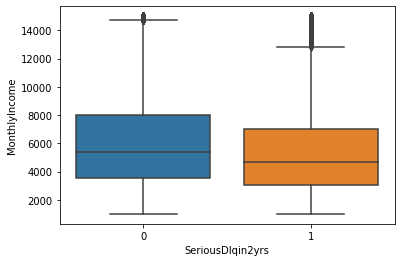

In [80]:
sns.boxplot(df['SeriousDlqin2yrs'],df['MonthlyIncome'])

In [81]:
q1 = df['MonthlyIncome'].quantile(0.25)
q2 = df['MonthlyIncome'].quantile(0.5)
q3 = df['MonthlyIncome'].quantile(0.75)

In [82]:
def mi_cat(mi):
    if mi<=q1:
        return 1
    elif q1<mi<=q2:
        return 2
    elif q2<mi<=q3:
        return 3
    else:
        return 4

In [83]:
df['mi_cat'] = df['MonthlyIncome'].apply(mi_cat)

In [84]:
df['MonthlyIncome'].groupby(by=df['mi_cat']).agg(['min','max'])

,min,max
mi_cat,,
1,1000.0,3500.0
2,3501.0,5346.0
3,5347.0,7916.0
4,7917.0,15000.0


In [85]:
pd.crosstab(df['mi_cat'],df['SeriousDlqin2yrs'],normalize=0)

SeriousDlqin2yrs,0,1
mi_cat,,
1,0.914624,0.085376
2,0.926955,0.073045
3,0.940194,0.059806
4,0.951108,0.048892


(0.75, 1)

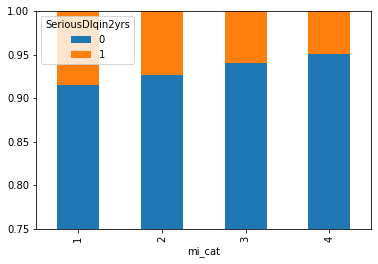

In [86]:
ct = pd.crosstab(df['mi_cat'],df['SeriousDlqin2yrs'],normalize=0)
ct.plot.bar(stacked=True)
plt.ylim(0.75,1)

### Age

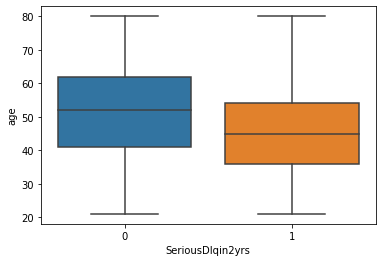

In [87]:
sns.boxplot(df['SeriousDlqin2yrs'],df['age'])

In [88]:
# Model Building

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
ID                                      150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null float64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null float64
NumberOfDependents                      150000 non-null float64
rucl_cat                                150000 non-null int64
mi_cat                                  150000 non-null int64
dtypes: float64(6), int64(5)
memory usage: 12.6 MB


In [90]:
y = df['SeriousDlqin2yrs']
X = df.drop(['ID','SeriousDlqin2yrs','rucl_cat','mi_cat'],axis=1)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [93]:
print(X_train.shape,X_test.shape)

(105000, 7) (45000, 7)


In [94]:
import statsmodels.api as sm

In [95]:
X_constant = sm.add_constant(X_train)

E:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [96]:
# Checking for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]

vif['features'] = X_constant.columns
vif

,vif,features
0,24.482626,const
1,1.105232,RevolvingUtilizationOfUnsecuredLines
2,1.137680,age
3,1.292067,DebtRatio
4,1.137736,MonthlyIncome
5,1.316906,NumberOfOpenCreditLinesAndLoans
6,1.476651,NumberRealEstateLoansOrLines
7,1.088405,NumberOfDependents


In [98]:
logit_model = sm.Logit(y_train,X_constant)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.219530
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               105000
Model:                          Logit   Df Residuals:                   104992
Method:                           MLE   Df Model:                            7
Date:                Thu, 03 Oct 2019   Pseudo R-squ.:                  0.1079
Time:                        09:48:27   Log-Likelihood:                -23051.
converged:                       True   LL-Null:                       -25839.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.7346      0.0

In [99]:
X_test_c = sm.add_constant(X_test)
y_prob = result.predict(X_test_c)

In [100]:
y_test = pd.DataFrame(y_test)
y_test['prob'] = y_prob

In [101]:
y_test.head()

,SeriousDlqin2yrs,prob
59770,0,0.018026
21362,0,0.018831
127324,0,0.030546
140509,0,0.167137
144297,0,0.035341


In [102]:
y_test['y_pred'] = y_test['prob'].apply(lambda x: 1 if x>=0.5 else 0)

In [103]:
y_test.head()

,SeriousDlqin2yrs,prob,y_pred
59770,0,0.018026,0
21362,0,0.018831,0
127324,0,0.030546,0
140509,0,0.167137,0
144297,0,0.035341,0


In [104]:
from sklearn.metrics import confusion_matrix,roc_curve,accuracy_score,auc,roc_auc_score

In [105]:
confusion_matrix(y_test['SeriousDlqin2yrs'],y_test['y_pred'])

array([[42020,     0],
       [ 2980,     0]], dtype=int64)

In [106]:
fpr,tpr,thresh = roc_curve(y_test['SeriousDlqin2yrs'],y_test['prob'])

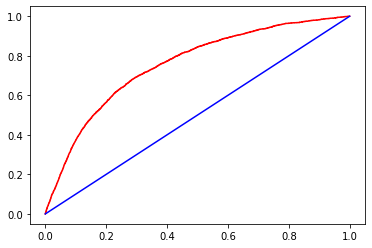

In [107]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

In [108]:
roc_auc_score(y_test['SeriousDlqin2yrs'],y_test['prob'])

0.7547592309830091

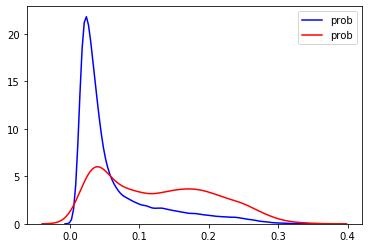

In [109]:
sns.kdeplot(y_test[y_test['SeriousDlqin2yrs']==0]['prob'],color='b')
sns.kdeplot(y_test[y_test['SeriousDlqin2yrs']==1]['prob'],color='r')

### Logistic Regression - ML

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
LR = LogisticRegression()

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [113]:
LR.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
y_pred = LR.predict(X_test)

In [115]:
confusion_matrix(y_test,y_pred)

array([[42020,     0],
       [ 2980,     0]], dtype=int64)

In [116]:
y_prob = LR.predict_proba(X_test)[:,1]

In [117]:
y_prob

array([0.03310855, 0.03911367, 0.06915616, ..., 0.14889874, 0.23742865,
       0.10304783])

In [118]:
fpr,tpr,thresh = roc_curve(y_test,y_prob)

In [119]:
roc_auc_score(y_test,y_prob)

0.6401755076681287

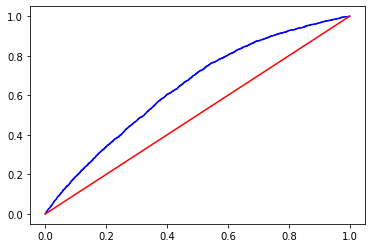

In [120]:
plt.plot(fpr,tpr,color='b')
plt.plot(fpr,fpr,color='r')

In [121]:
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV

In [122]:
lr = LogisticRegression()

In [123]:
param_grid = {
    'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1,1.1,1.2,1.3,1.4,1.5,1.6],
    'penalty':['l1','l2']
}

In [124]:
gs = GridSearchCV(lr,param_grid,cv=3,scoring='accuracy')
gs.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 1.1,
                               1.2, 1.3, 1.4, 1.5, 1.6],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [125]:
gs.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [126]:
lr = LogisticRegression(**gs.best_params_)

In [127]:
lr.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
y_pred = lr.predict(X_test)

In [129]:
y_prob = lr.predict_proba(X_test)[:,1]

In [130]:
fpr,tpr,thresh = roc_curve(y_test,y_prob)
roc_auc_score(y_test,y_prob)

0.7546705148395301

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
sc = StandardScaler()

In [133]:
X_trains = sc.fit_transform(X_train)
X_tests = sc.transform(X_test)

In [134]:
lr.fit(X_trains,y_train)
y_prob = lr.predict_proba(X_tests)[:,1]

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [135]:
fpr,tpr,thresh = roc_curve(y_test,y_prob)
roc_auc_score(y_test,y_prob)

0.754714765100671

In [136]:
diff = tpr - fpr

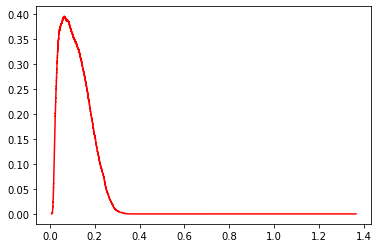

In [137]:
plt.plot(thresh,diff,color='r')

In [138]:
optimal_idx = np.argmax(tpr-fpr)
opt_thresh = thresh[optimal_idx]
opt_thresh

0.06363109181265546

In [142]:
df1 = pd.read_pickle('gmsc_clean.pkl')

In [143]:
df1.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,1,0.766127,45.0,0.802982,9120.0,13,1.0,2.0
1,2,0,0.957151,40.0,0.121876,2600.0,4,0.0,1.0
2,3,0,0.658180,38.0,0.085113,3042.0,2,0.0,0.0
3,4,0,0.233810,30.0,0.036050,3300.0,5,0.0,0.0
4,5,0,0.907239,49.0,0.024926,3300.0,7,1.0,0.0


In [144]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 9 columns):
ID                                      150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null float64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null float64
NumberOfDependents                      150000 non-null float64
dtypes: float64(6), int64(3)
memory usage: 10.3 MB


In [146]:
ID = df1[['ID']]
X = df1.drop(['SeriousDlqin2yrs','ID'],axis=1)
y = df1['SeriousDlqin2yrs']

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
rf = RandomForestClassifier()

In [151]:
rf.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [152]:
y_pred = rf.predict(X_test)

In [156]:
y_prob = rf.predict_proba(X_test)[:,1]

In [157]:
y_prob

array([0.1, 0.1, 0. , ..., 0.3, 0.6, 0.1])

In [158]:
confusion_matrix(y_test,y_pred)

array([[41829,   191],
       [ 2918,    62]], dtype=int64)

In [159]:
fpr,tpr,thresh = roc_curve(y_test,y_prob)

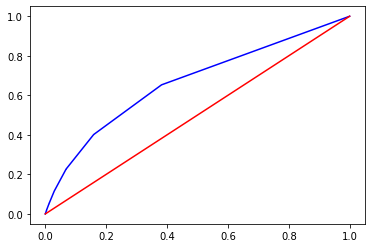

In [160]:
plt.plot(fpr,tpr,color='b')
plt.plot(fpr,fpr,color='r')

In [161]:
roc_auc_score(y_test,y_prob)

0.6652953291657218

Lets tune the rf classifier and evaluate the performance.

In [175]:
param_grid = {
    'max_depth':[4,8,10],
    'min_samples_leaf':range(100,400,100),
    'min_samples_split':range(200,500,100),
    'n_estimators':range(1,20,5), # no of trees
    'max_features':range(2,7,1)
}

In [176]:
rf1 = RandomForestClassifier()
gs1 = GridSearchCV(rf1,param_grid = param_grid,cv=3,n_jobs=-1)
gs1.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [177]:
gs1.best_params_

{'max_depth': 4,
 'max_features': 2,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 1}

In [178]:
rf2 = RandomForestClassifier(**gs1.best_params_)

In [179]:
rf2.fit(X_train,y_train)
y1_prob = rf2.predict_proba(X_test)[:,1]
y1_pred = rf2.predict(X_test)

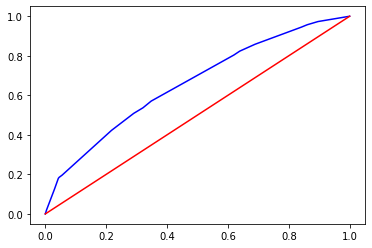

In [180]:
fpr1,tpr1,thr1 = roc_curve(y_test,y1_prob)
plt.plot(fpr1,tpr1,color='b')
plt.plot(fpr1,fpr1,color='r')

In [181]:
roc_auc_score(y_test,y1_prob)

0.6582256731374322

In [182]:
scores = pd.DataFrame(gs1.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.121675,0.004310,0.026264,0.008319,4,2,100,200,1,"{'max_depth': 4, 'max_features': 2, 'min_sampl...",0.932888,0.932886,0.932912,0.932895,0.000012,1
1,0.478388,0.037883,0.034575,0.001244,4,2,100,200,6,"{'max_depth': 4, 'max_features': 2, 'min_sampl...",0.932888,0.932886,0.932912,0.932895,0.000012,1
2,0.793544,0.030132,0.053856,0.005641,4,2,100,200,11,"{'max_depth': 4, 'max_features': 2, 'min_sampl...",0.932888,0.932886,0.932912,0.932895,0.000012,1
3,1.198129,0.022394,0.074467,0.006781,4,2,100,200,16,"{'max_depth': 4, 'max_features': 2, 'min_sampl...",0.932888,0.932886,0.932912,0.932895,0.000012,1
4,0.104052,0.002348,0.014628,0.000469,4,2,100,300,1,"{'max_depth': 4, 'max_features': 2, 'min_sampl...",0.932888,0.932886,0.932912,0.932895,0.000012,1


In [188]:
p_g = {
    'max_depth':range(2,8,1),
    'min_samples_leaf':range(2,50,1),
    'min_samples_split':range(2,50,1),
    'n_estimators':range(1,20,5), # no of trees
    'max_features':range(2,7,1)
}

In [189]:
rf3 = RandomForestClassifier()
rs1 = RandomizedSearchCV(rf3,param_distributions=p_g,cv=3,n_jobs=-1)
rs1.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

We noticed that RandomizedCV completed task much faster than GridSearchCV

In [190]:
rs1.best_params_

{'n_estimators': 6,
 'min_samples_split': 12,
 'min_samples_leaf': 29,
 'max_features': 2,
 'max_depth': 7}

In [191]:
rf3 = RandomForestClassifier(**rs1.best_params_)
rf3.fit(X_train,y_train)
y2_prob = rf3.predict_proba(X_test)[:,1]
y2_pred = rf3.predict(X_test)

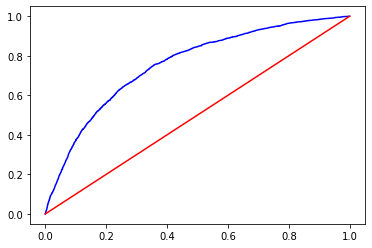

In [192]:
fpr,tpr,thresh = roc_curve(y_test,y2_prob)
plt.plot(fpr,tpr,color='b')
plt.plot(fpr,fpr,color='r')

In [193]:
roc_auc_score(y_test,y2_prob)

0.7557860909953393

The performance of the tuned RF is very similar to Logistic Regression Models

### Sensitivity Analysis using Cost Benifit Matrix

In [195]:
rf = RandomForestClassifier(**gs1.best_params_)
rf.fit(X_train,y_train)
y_prob = rf.predict_proba(X_test)
y_prob =  pd.DataFrame(y_prob)

In [196]:
y_prob.head()

,0,1
0,0.986331,0.013669
1,0.986331,0.013669
2,0.967784,0.032216
3,0.829570,0.170430
4,0.928487,0.071513


In [201]:
net_gain = []
i_vals = []
for i in np.linspace(0,1,10):
    y_pred = y_prob[1].apply(lambda x:1 if x>i else 0)
    conf = confusion_matrix(y_test,y_pred)
    total_profit = (conf[0][0]*25) + (conf[0][1]*-25) + (conf[1][0]*-50)
    net_gain.append(total_profit)
    i_vals.append(i)

In [202]:
net_gain

[-1050500,
 706700,
 877550,
 901500,
 901500,
 901500,
 901500,
 901500,
 901500,
 901500]

Max Profit is 901500

Expected Profit from a good customer is 25.
Hence when we turn away a good customer we lose this profit. Due to this cell(0,0) and cell(0,1) is impacted by this.

Expected loss from a defaulted customer is 50

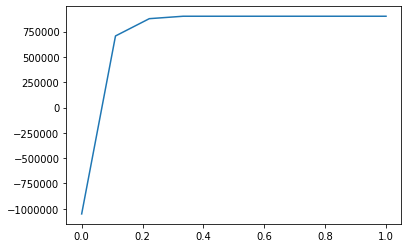

In [206]:
plt.plot(i_vals,net_gain)
# plt.xticks(i_vals)

In [205]:
optimal_idx = np.argmax(net_gain)
optimal_threshold = i_vals[optimal_idx]
optimal_threshold

0.3333333333333333

Given the above cost-benifit matrix, 0.33 is the optimal cut-off maximising the profit for the organisation